## 0.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def settings():
  ## show plots in our colab
    %matplotlib inline
   
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [30, 12]
    plt.rcParams['font.size'] = 24
    
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
settings()

## 0.2 LOADING DATA

In [4]:
df = pd.read_csv("./Autolib_dataset (2).csv")

## STEP 1 DESCRIPTION OF DATA

In [5]:
df.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [6]:
# first five columns

df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


## 1.2 Data Dimensions

In [7]:
print( 'Number of Rows: {}'.format( df.shape[0] ) )
print( 'Number of Cols: {}'.format( df.shape[1] ) )

Number of Rows: 5000
Number of Cols: 25


## 1.3 Data Types

In [8]:
df.dtypes

Address                object
Cars                    int64
Bluecar counter         int64
Utilib counter          int64
Utilib 1.4 counter      int64
Charge Slots            int64
Charging Status        object
City                   object
Displayed comment      object
ID                     object
Kind                   object
Geo point              object
Postal code             int64
Public name            object
Rental status          object
Scheduled at           object
Slots                   int64
Station type           object
Status                 object
Subscription status    object
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
dtype: object

In [9]:
# convert year month day column columns into one column date

cols=["year","month","day"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [10]:
# function "datetime" transforma the columns "date" from object (string) to datetime.

df['date'] = pd.to_datetime( df['date'] )



## Verify Data Quality
Examine the quality of the data, addressing questions such as:


• Is the data complete (does it cover all the cases required)?

• Is it correct, or does it contain errors and, if there are errors, how common are they?

• Are there missing values in the data? If so, how are they represented, where do they occur,
and how common are they?

## 1.4 Check NA





In [11]:
#Check null values

df.isna().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
date                      0
dtype: int64

In [12]:
# Percentage of null values in df

pd.DataFrame({'Missing values (%)': df.isnull().sum()/len(df.index)*100})

,Missing values (%)
Address,0.00
Cars,0.00
Bluecar counter,0.00
Utilib counter,0.00
Utilib 1.4 counter,0.00
Charge Slots,0.00
Charging Status,0.00
City,0.00
Displayed comment,97.78
ID,0.00


qualified to drop columns with nulll values more than 70 percent

In [13]:
# delete columns at index 8, 15. -1

df.drop(df.columns[[8, 15, -1, ]], axis = 1, inplace = True)
  

## 1.5 Descriptive Statistical

In [14]:
# separate categorical data and numerical data


num_attributes = df.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [15]:
num_attributes.sample()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
3584,2,2,0,0,0,93400,3,2018,4,1,22,22


In [16]:
cat_attributes.sample()

,Address,Charging Status,City,ID,Kind,Geo point,Public name,Rental status,Station type,Status,Subscription status
4426,1 Rue Georges Corete,nonexistent,Gennevilliers,gennevilliers-georgescorete-1,SPACE,"48.91757, 2.307151",Gennevilliers/Georges Corete/1,broken,full_station,closed,broken


### 1.5.1. Numerical Attributes

In [17]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T


In [18]:
# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply(sum)).T

In [19]:
# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5 ] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'sum'])

In [20]:
m

,attributes,min,max,range,mean,median,std,sum
0,Cars,0.0,7.0,7.0,2.3336,2.0,2.035070,11668.0
1,Bluecar counter,0.0,7.0,7.0,2.3336,2.0,2.035070,11668.0
2,Utilib counter,0.0,2.0,2.0,0.0596,0.0,0.246674,298.0
3,Utilib 1.4 counter,0.0,3.0,3.0,0.1230,0.0,0.356470,615.0
4,Charge Slots,0.0,2.0,2.0,0.2534,0.0,0.546249,1267.0
5,Postal code,75001.0,95880.0,20879.0,82634.8784,75019.0,8834.982090,413174392.0
6,Slots,0.0,7.0,7.0,1.9324,1.0,1.905211,9662.0
7,year,2018.0,2018.0,0.0,2018.0000,2018.0,0.000000,10090000.0
8,month,4.0,4.0,0.0,4.0000,4.0,0.000000,20000.0
9,day,1.0,9.0,8.0,4.9416,5.0,2.596804,24708.0


In [21]:
## no duplicated values

num_attributes.duplicated().value_counts()

False    4999
True        1
dtype: int64

### 1.5.2. Categorical attributes

In [22]:

#unique categorical variables count

cat_attributes.apply( lambda x: x.unique().shape[0] )

Address                1104
Charging Status           3
City                     88
ID                     1105
Kind                      4
Geo point              1105
Public name            1105
Rental status             4
Station type              3
Status                    3
Subscription status       3
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


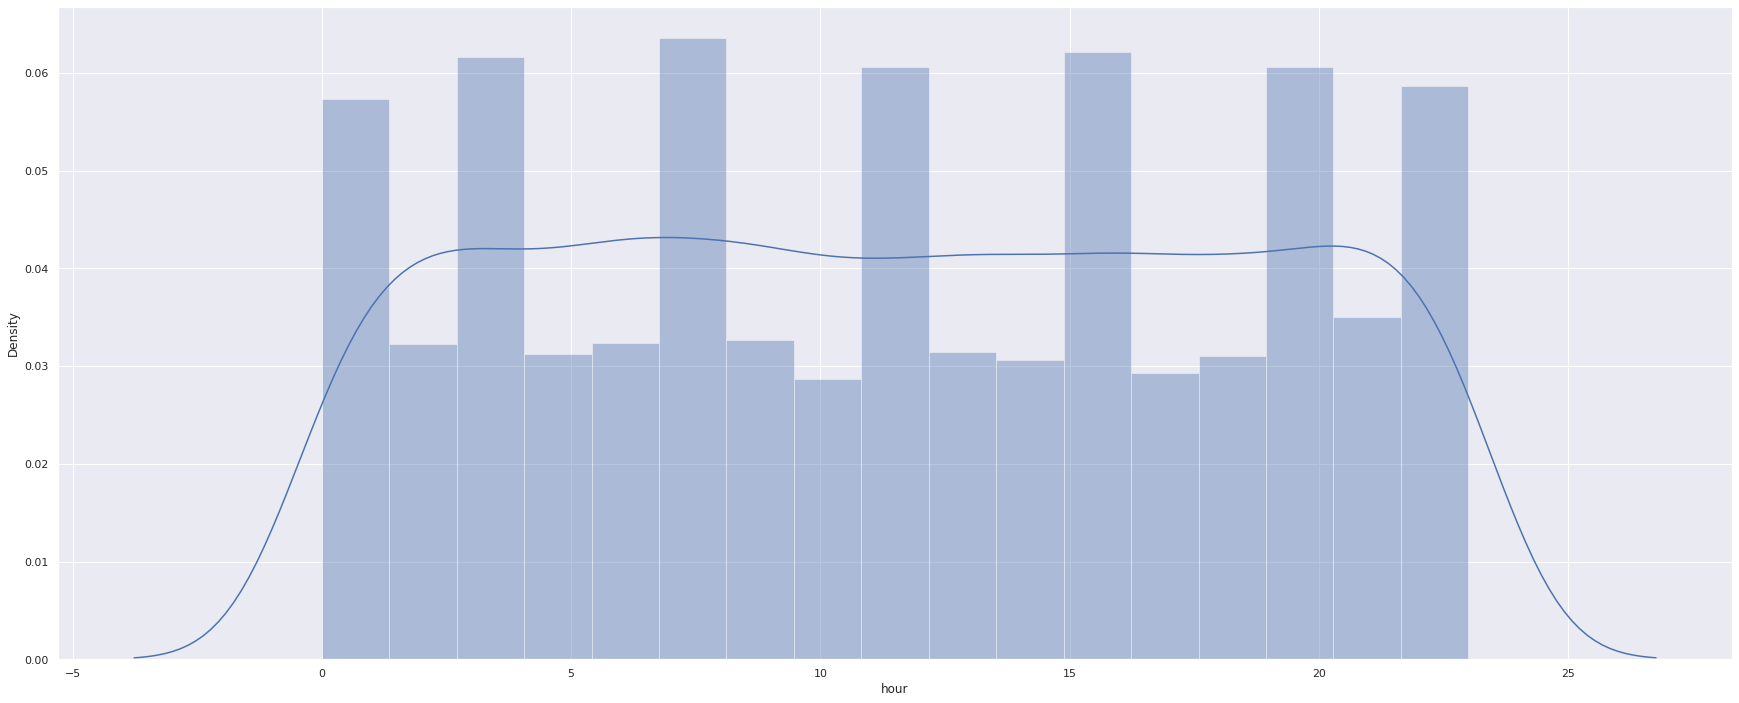

In [23]:
# response variable no of hours distributed by our cars 

sns.distplot( df['hour'] )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


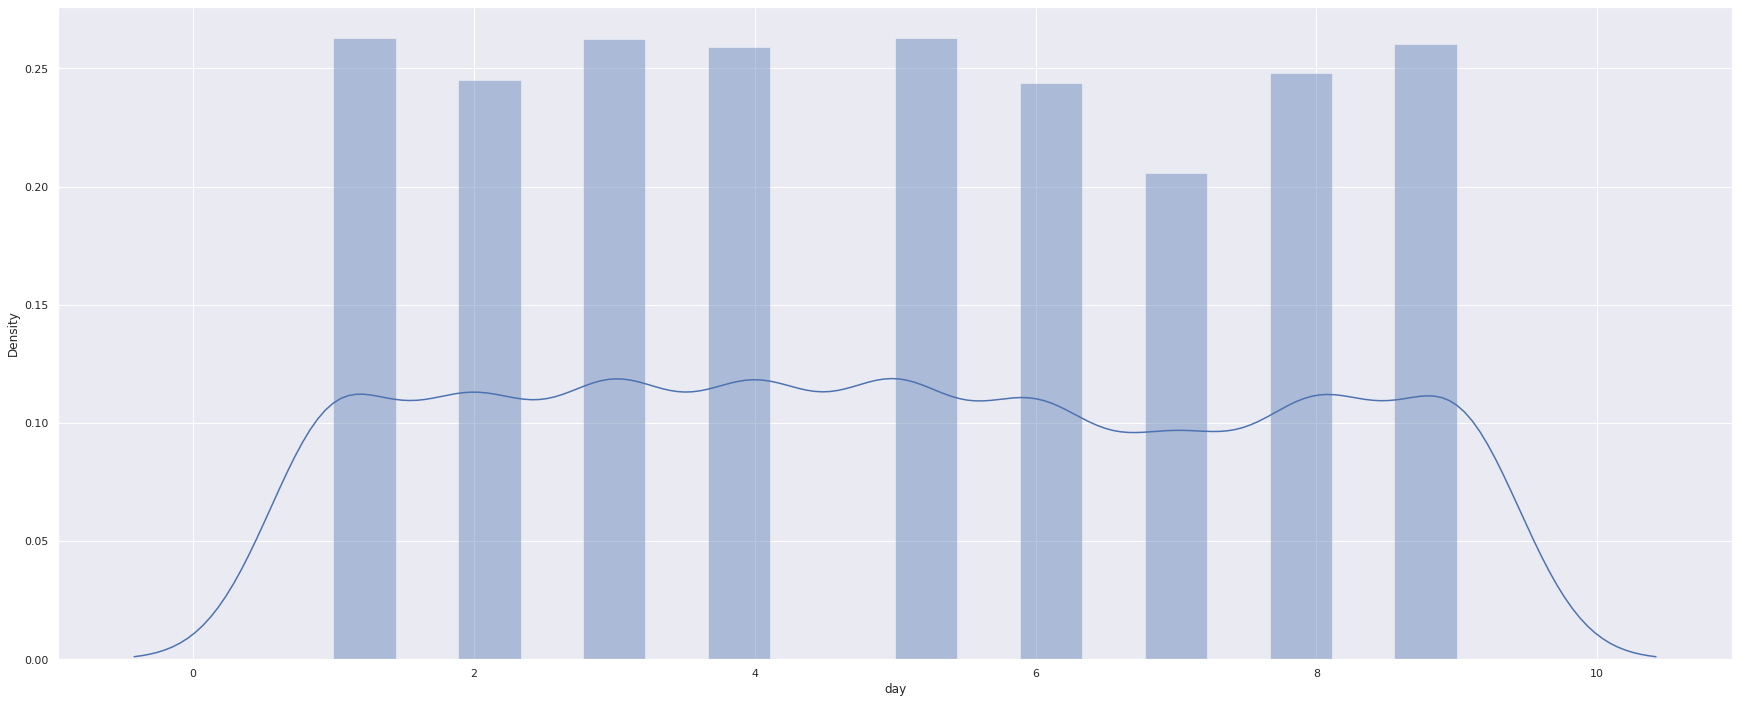

In [24]:
# distribtion of the day activity 
sns.distplot(df["day"])

####  1.5.3 Categorical Attributes

In [25]:
# count of unique values in categorical variables

cat_attributes.apply( lambda x: x.unique().shape[0] )

Address                1104
Charging Status           3
City                     88
ID                     1105
Kind                      4
Geo point              1105
Public name            1105
Rental status             4
Station type              3
Status                    3
Subscription status       3
dtype: int64

### 1.5.4 Check for outliers using boxplots

In [26]:
df.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City', 'ID',
       'Kind', 'Geo point', 'Postal code', 'Public name', 'Rental status',
       'Slots', 'Station type', 'Status', 'Subscription status', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

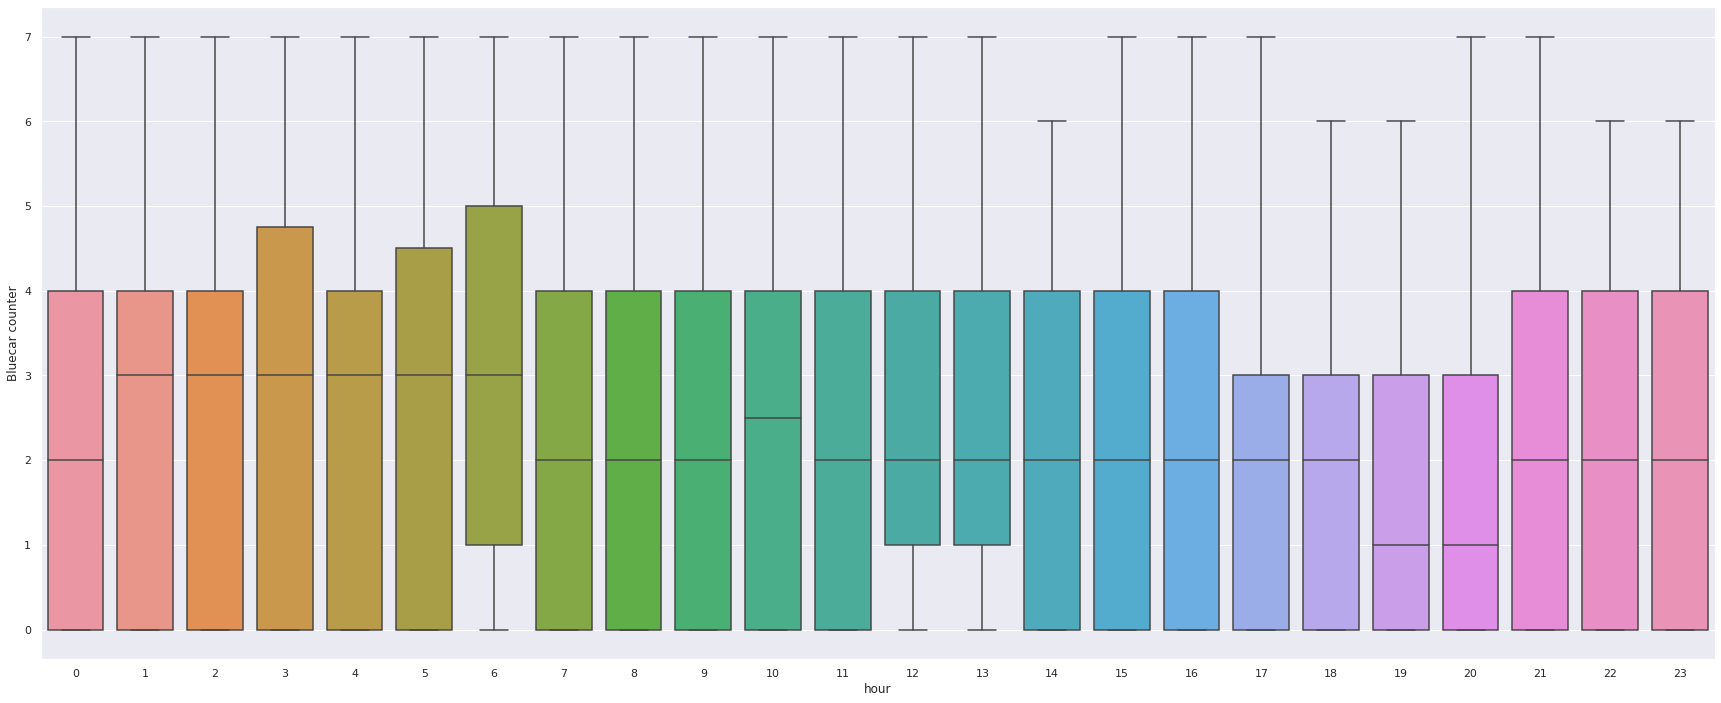

In [27]:
ax = sns.boxplot(x="hour", y="Bluecar counter", data=df)

# no anomalies in our bluecar counter over the hours

In [28]:
df["Utilib counter"].value_counts()

0    4714
1     274
2      12
Name: Utilib counter, dtype: int64

## STEP 2 - EXPLORATORY DATA ANALYSIS

#### 2.1 Univariate Analysis

In [29]:
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


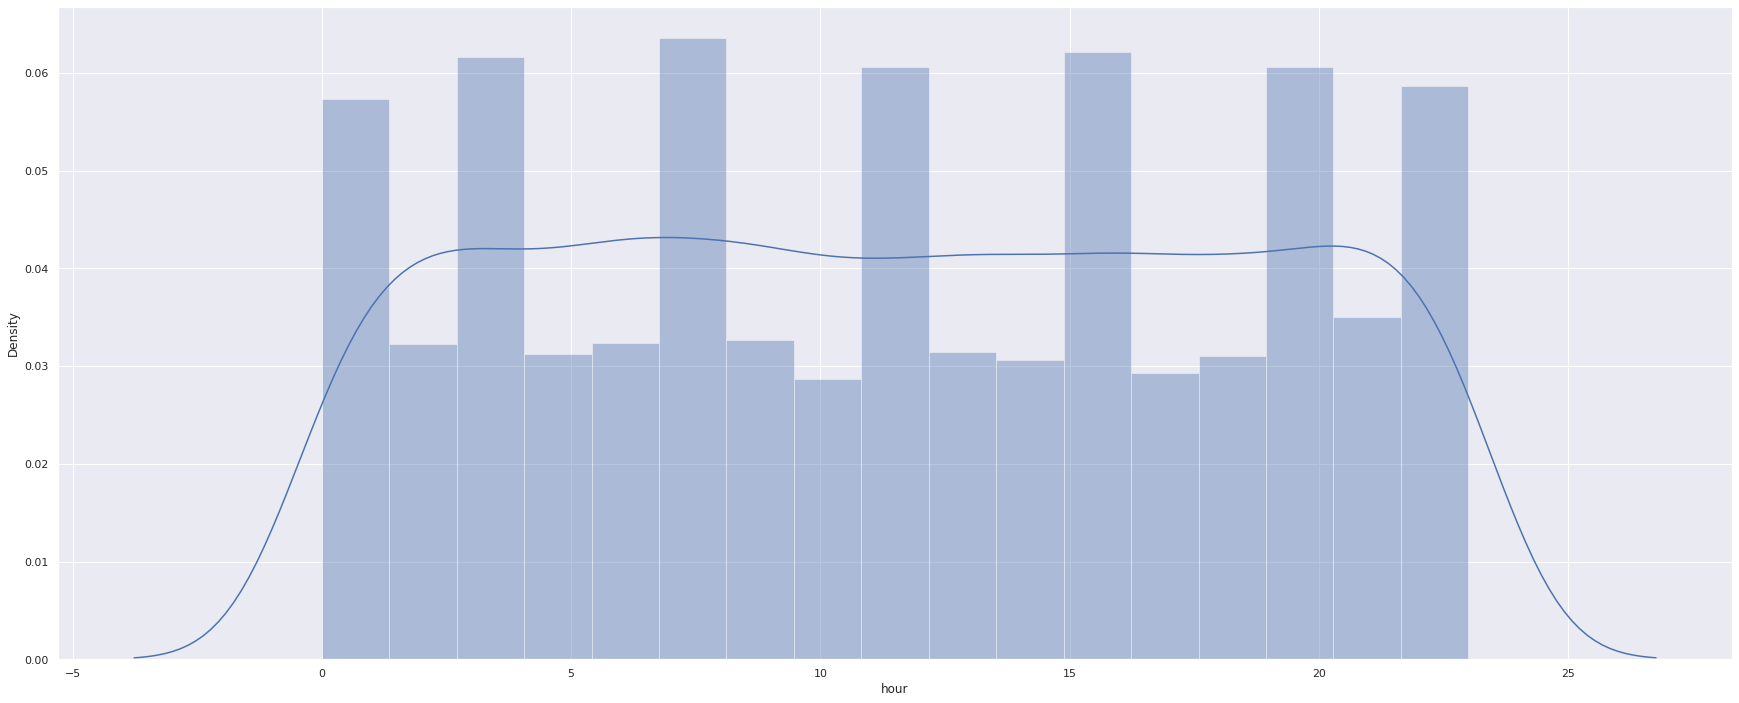

In [30]:
# spread of hours over the whole df

sns.distplot( df['hour'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


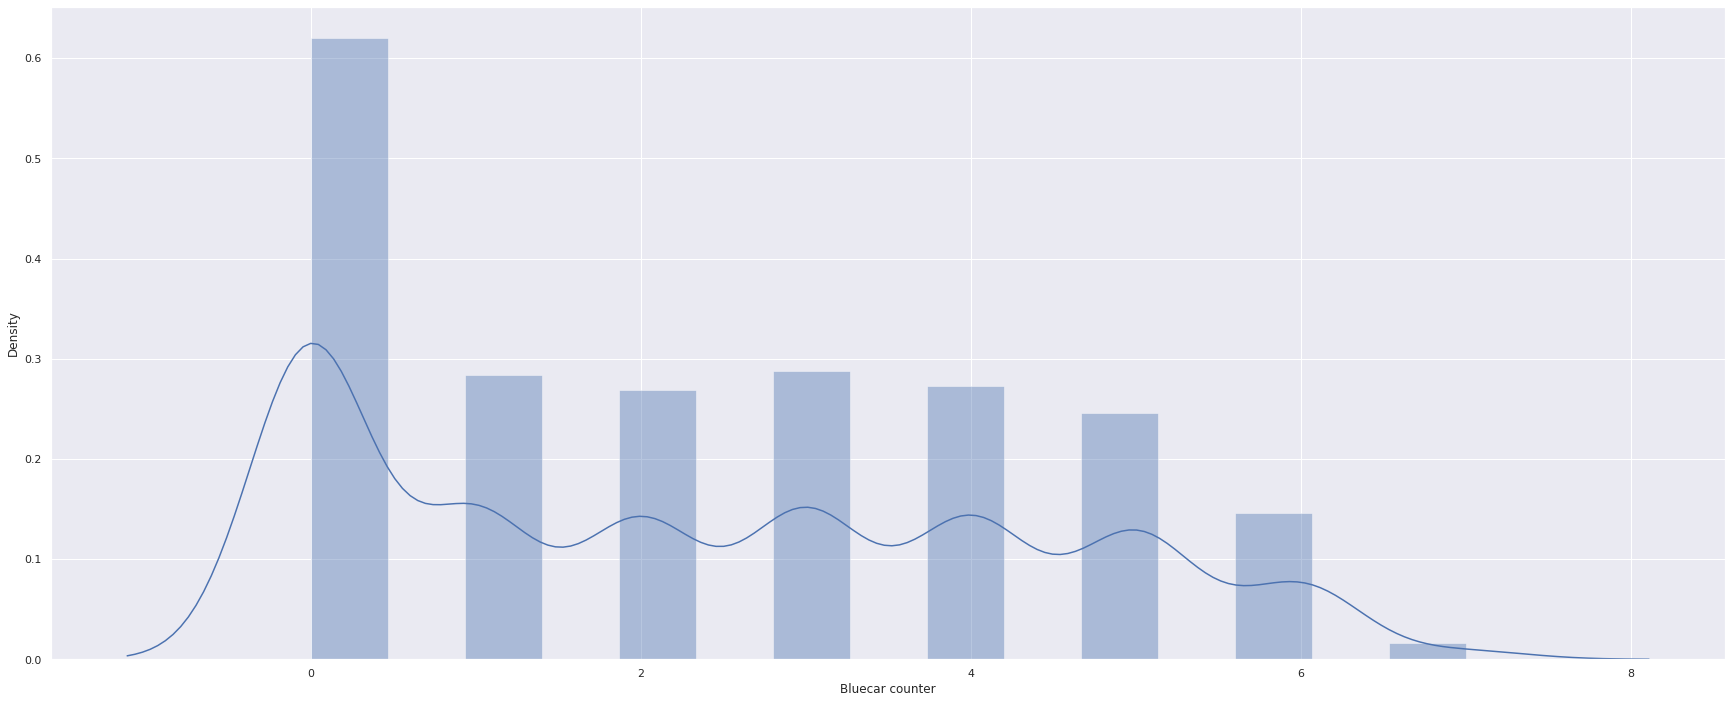

In [31]:
#notice how we have a lot of zeros but apart from that we have normal data

sns.distplot( df['Bluecar counter'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


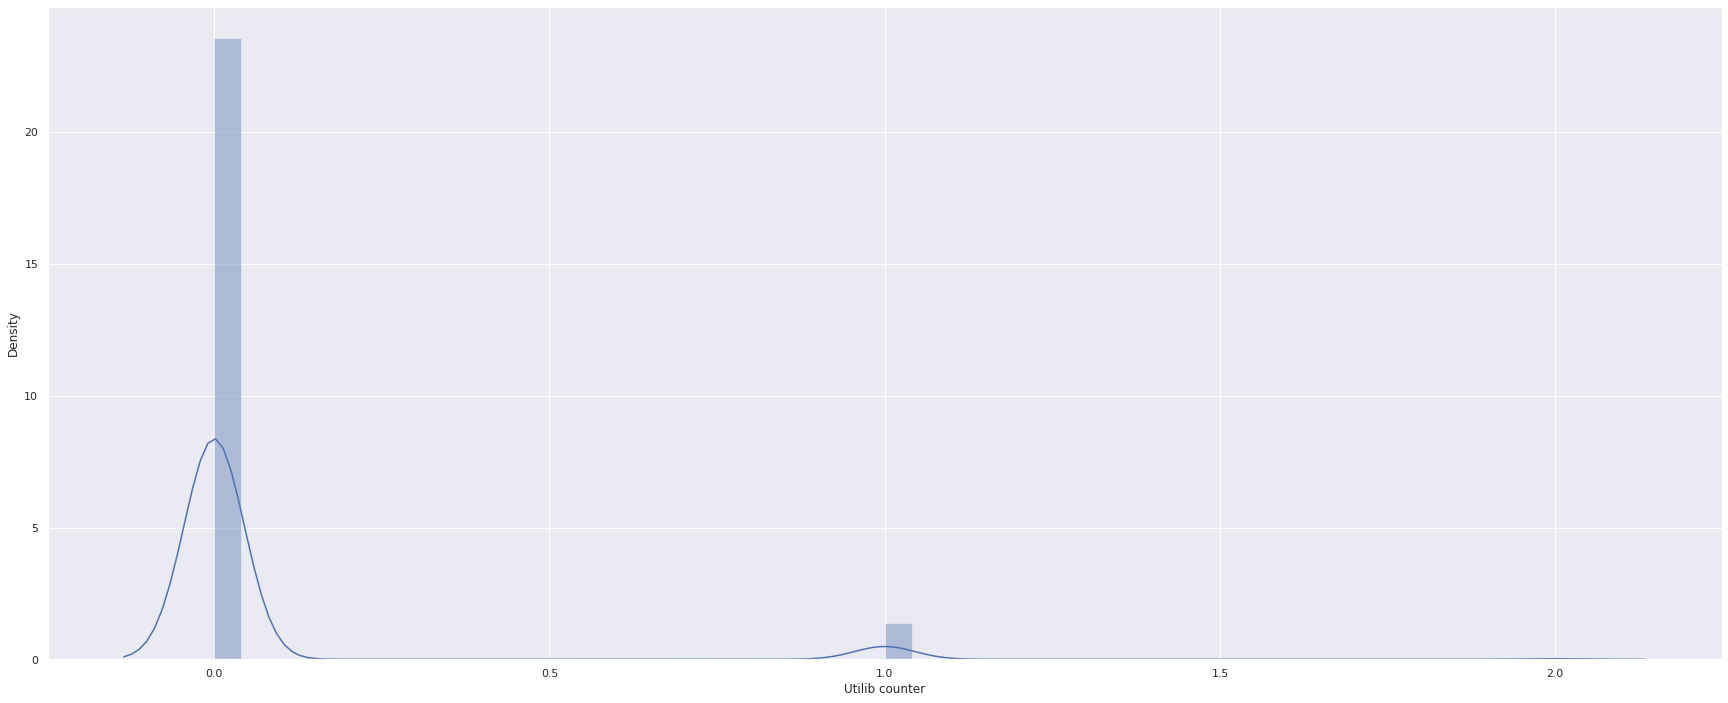

In [32]:
# highly skewed to the left this is a concern
sns.distplot( df['Utilib counter'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


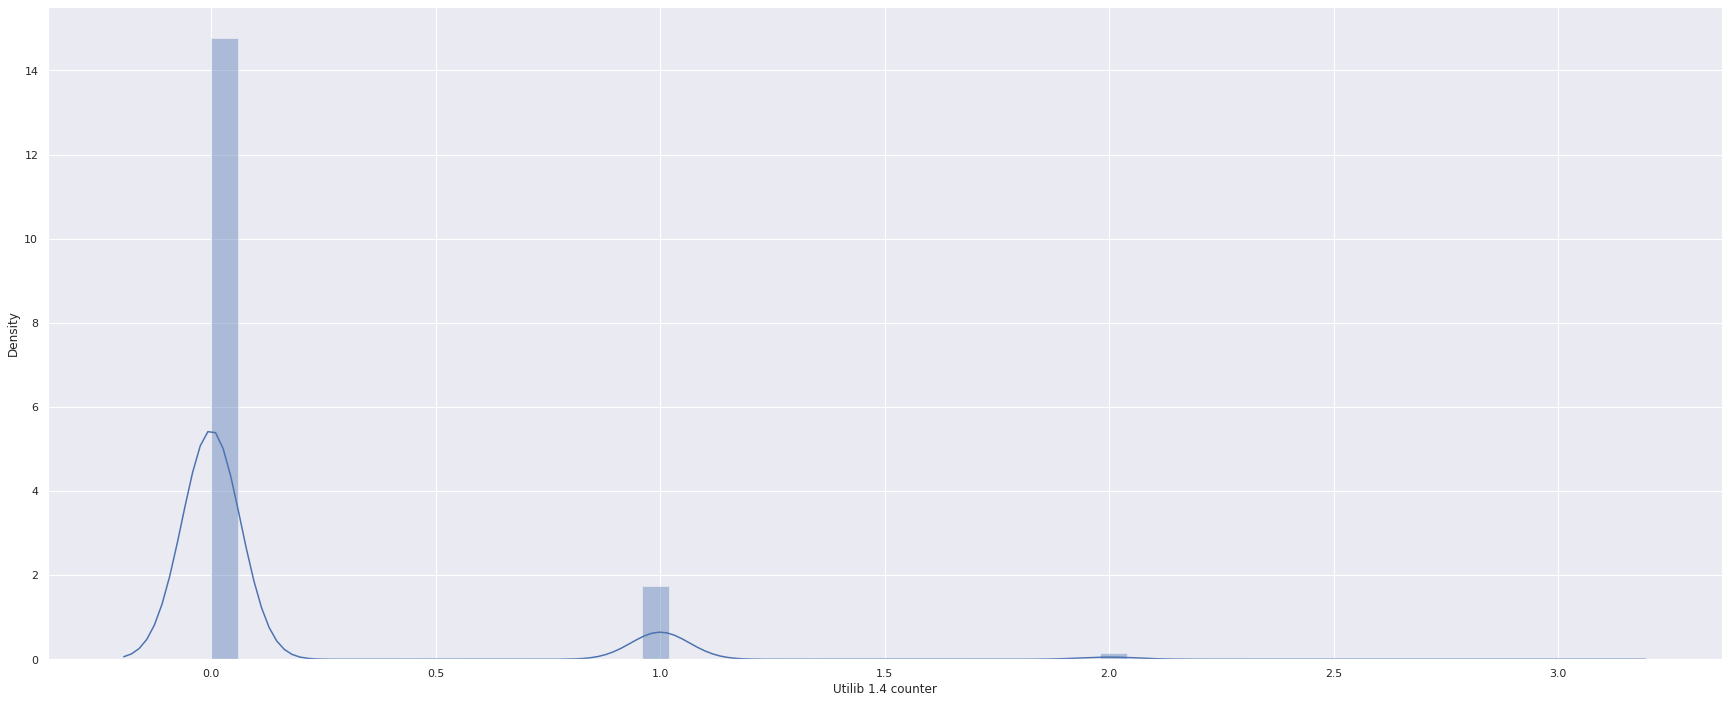

In [33]:
# highly skewed to the left
sns.distplot( df['Utilib 1.4 counter'])

In [34]:
# paris has a lot of activity
df["City"].value_counts()

Paris                    2816
Nanterre                  127
Issy-les-Moulineaux       101
Rueil-Malmaison            88
CrÃ©teil                   88
AsniÃ¨res-sur-Seine        70
Colombes                   67
Montreuil                  63
Boulogne-Billancourt       63
Drancy                     62
Suresnes                   59
Gennevilliers              56
Saint-Ouen                 49
Alfortville                46
Clamart                    45
Levallois-Perret           39
Fontenay-aux-Roses         37
SÃ¨vres                    36
Villejuif                  35
Aulnay-sous-bois           35
Vanves                     34
Champigny-sur-Marne        33
Malakoff                   31
ChÃ¢tillon                 31
Bagnolet                   30
Meudon                     28
La Garenne-Colombes        25
Cachan                     25
Limeil-BrÃ©vannes          24
Neuilly-Plaisance          24
ChÃ¢tenay-Malabry          23
Le Plessis-Robinson        22
Sceaux                     22
Bagneux   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


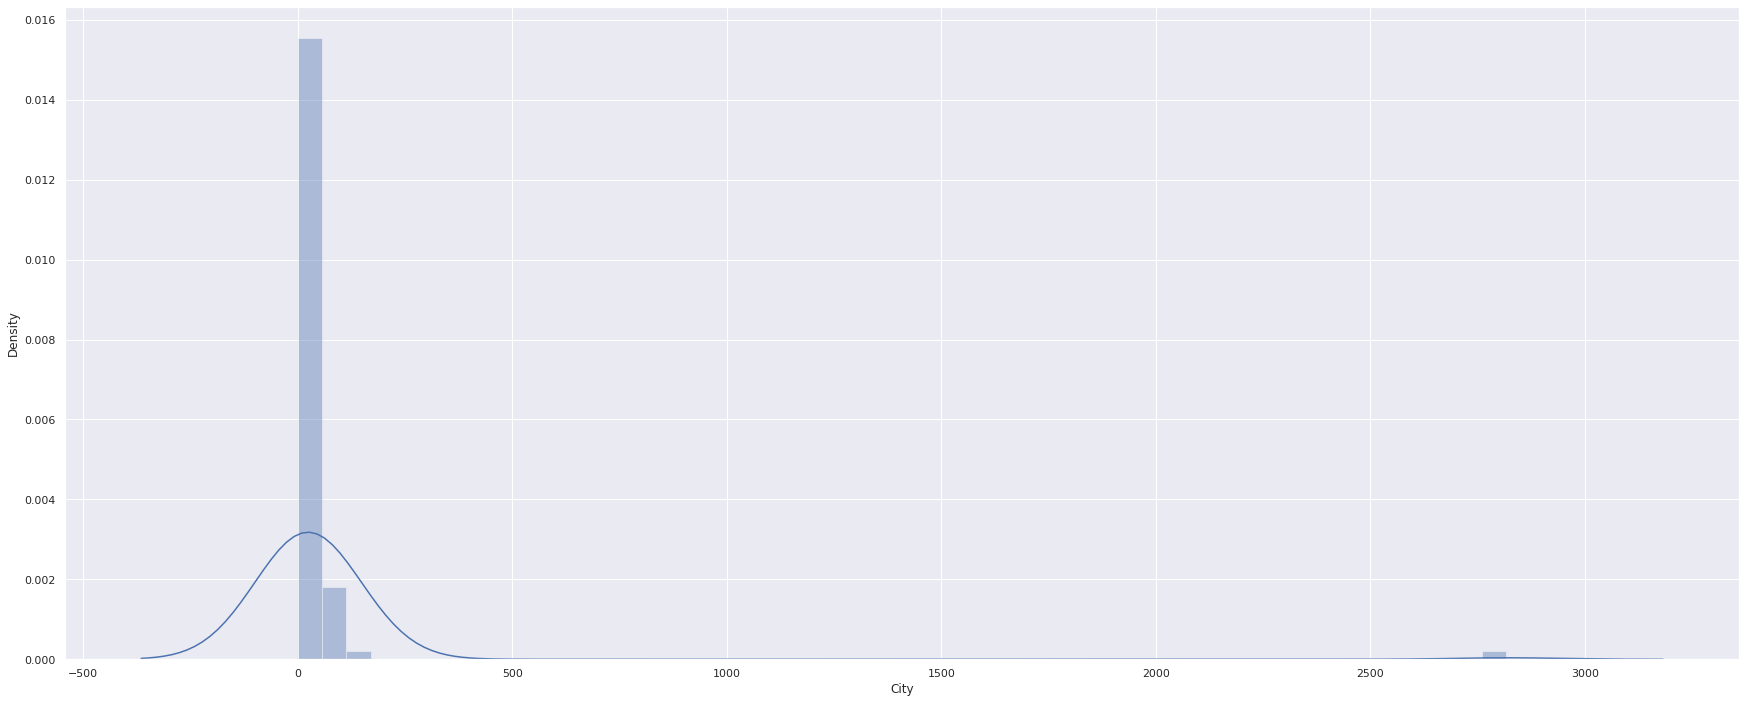

In [35]:
#highly skewed to the left
sns.distplot( df['City'].value_counts())

### 1.5.3 Numerical Variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba8f695d50>,
      dtype=object)

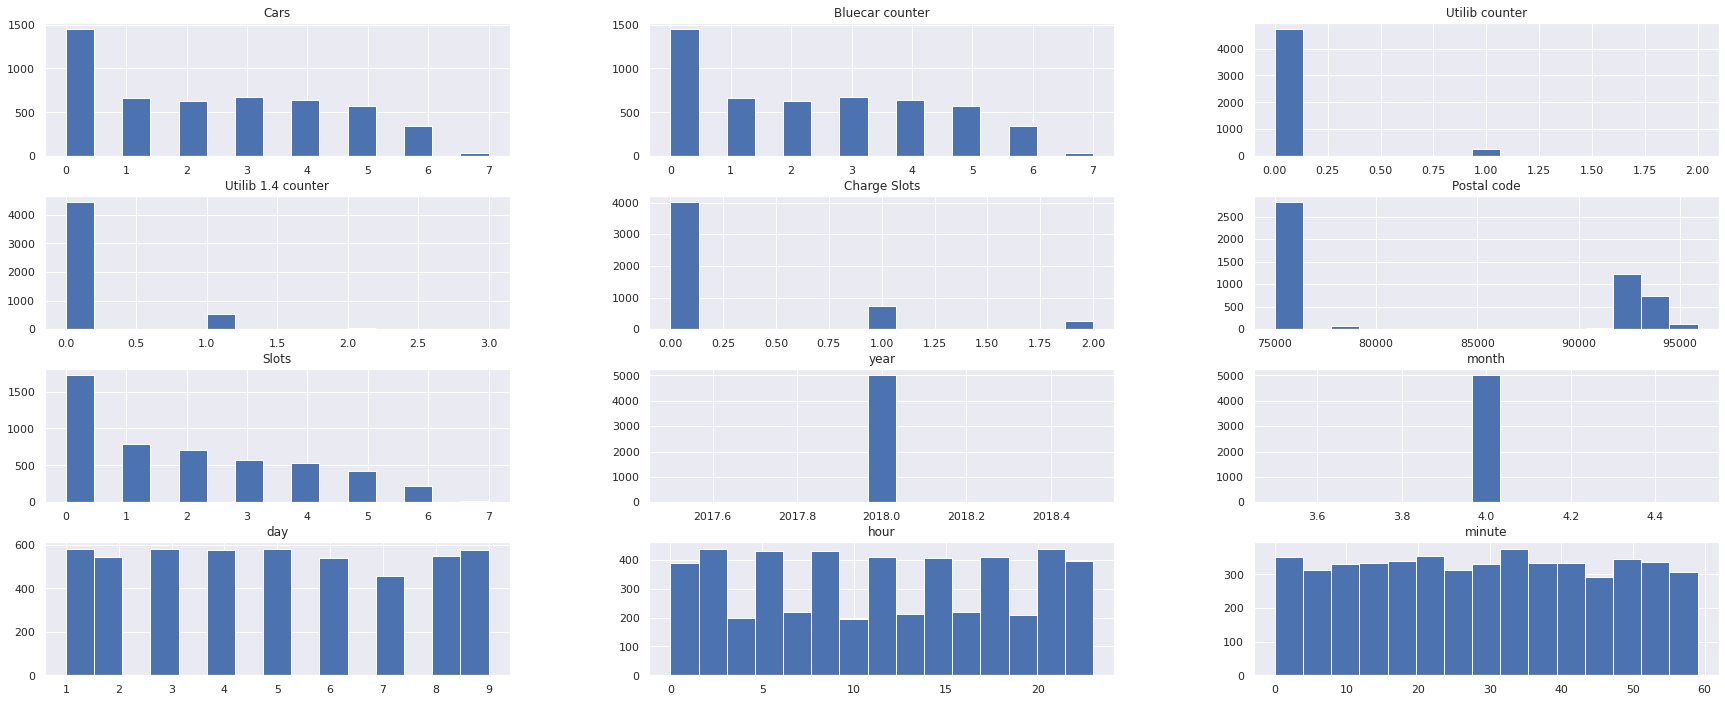

In [36]:
# distribution of hours over all our numerical categories

num_attributes.hist( bins=15 )

### 1.5.4 Categorical variable

In [37]:
cat_attributes.head()

,Address,Charging Status,City,ID,Kind,Geo point,Public name,Rental status,Station type,Status,Subscription status
0,2 Avenue de Suffren,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",Paris/Suffren/2,operational,station,ok,nonexistent
1,145 Rue Raymond Losserand,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",Paris/Raymond Losserand/145,operational,station,ok,nonexistent
2,2 Avenue John Fitzgerald Kennedy,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,nonexistent
3,51 Rue EugÃ¨ne OudinÃ©,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,nonexistent
4,6 avenue de la Porte de Champerret,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",Paris/Porte de Champerret/6,operational,station,ok,nonexistent


In [38]:
cat_attributes.columns

Index(['Address', 'Charging Status', 'City', 'ID', 'Kind', 'Geo point',
       'Public name', 'Rental status', 'Station type', 'Status',
       'Subscription status'],
      dtype='object')

In [39]:
df.sample(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
3110,48 Rue Henri Huchard,1,1,0,0,2,operational,Paris,paris-henrihuchard-48,STATION,"48.89919, 2.330375",75018,Paris/Henri Huchard/48,operational,4,station,ok,nonexistent,2018,4,4,14,29
2925,182 Boulevard Voltaire,5,5,0,0,0,operational,Paris,paris-voltaire-182,STATION,"48.8548, 2.385047",75011,Paris/Voltaire/182,operational,0,station,ok,nonexistent,2018,4,9,9,31
2948,1bis rue Ravignan,1,1,0,1,1,operational,Paris,paris-ravignan-1,STATION,"48.8850802, 2.3375536",75018,Paris/Ravignan/1,operational,3,station,ok,nonexistent,2018,4,9,16,9
2018,166 promenade du Verger,3,3,0,0,0,nonexistent,Issy-les-Moulineaux,issylesmoulineaux-promenadeduverger-166,STATION,"48.81731, 2.27009",92130,Issy-les-Moulineaux/Promenade du Verger/166,operational,2,station,ok,nonexistent,2018,4,1,10,12
2558,19 rue LÃ©on Renault,5,5,0,1,0,operational,Les Lilas,leslilas-leonrenault-19,STATION,"48.8810551, 2.4223705",93260,Les Lilas/LÃ©on Renault/19,operational,0,station,ok,nonexistent,2018,4,3,2,36


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


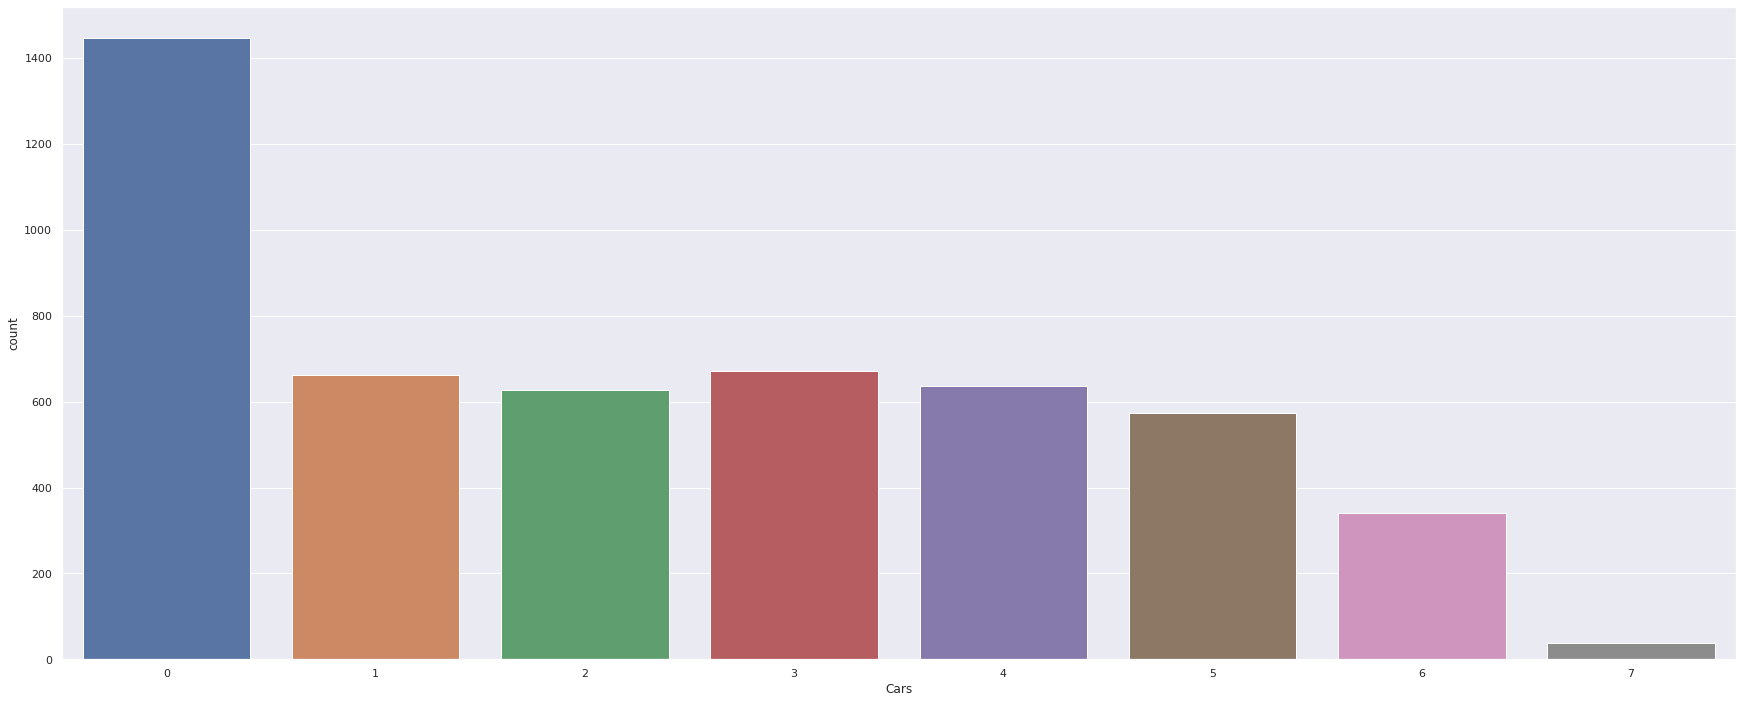

In [40]:

sns.countplot( df['Cars'] )

##Notice the there are a lot of zeros cars that arent accounted for maybe its an error but we will handle that


## 2.2 Bivariate analysis

In [41]:
# Identify the most popular hour of the day for picking up a shared electric car


q1  = df.groupby(["City", "day", "hour", "Postal code"], as_index=False)["Bluecar counter", "Utilib counter", "Utilib 1.4 counter"].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [42]:
q1.sample()

,City,day,hour,Postal code,Bluecar counter,Utilib counter,Utilib 1.4 counter
1991,Paris,3,9,75010,2,2,2


In [43]:
# get group from the city of paris


paris = q1.groupby(["City"]).get_group("Paris")

In [44]:
# group with the blue cars to get the hour of the day with the highest pickups
blue = paris.groupby(["Bluecar counter", "Postal code"], as_index=False)["hour", "day"].count().sort_values(ascending=False, by="Bluecar counter")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


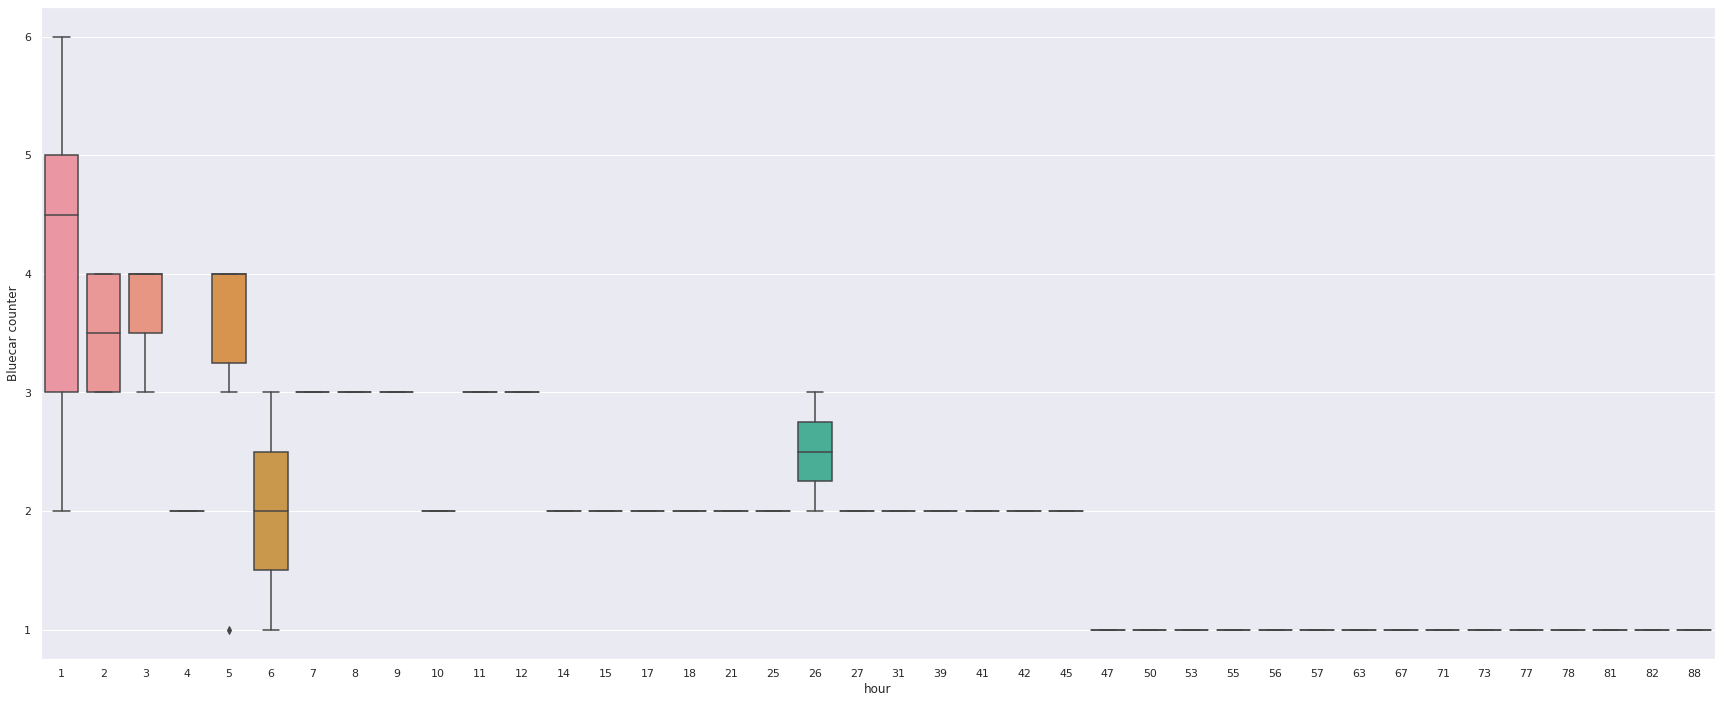

In [45]:
# highly skewed data to the left
sns.boxplot(x="hour", y="Bluecar counter", data = blue)

In [46]:
# What is the most popular hour for returning cars
returnn = df.groupby(["Rental status"]).get_group("operational")

In [47]:
returnn.sample()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4396,52 Rue de Bagneux,1,1,0,0,0,nonexistent,Sceaux,sceaux-bagneux-52,STATION,"48.7842765, 2.3027628",92330,Sceaux/Bagneux/52,operational,5,station,ok,nonexistent,2018,4,3,11,4


In [48]:
# 9:00pm is the most popular time to return cars

returnn.groupby(["Rental status"])["hour"].value_counts().sort_values(ascending=False)



Rental status  hour
operational    21      209
               6       207
               16      203
               2       202
               13      201
               18      200
               7       199
               9       197
               3       196
               5       196
               11      195
               8       194
               15      190
               12      188
               19      188
               23      188
               14      187
               20      187
               17      186
               4       184
               22      183
               10      182
               0       179
               1       177
Name: hour, dtype: int64

In [49]:
df.sample(3)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
1781,56 Rue La Fayette,2,2,0,0,2,operational,Paris,paris-lafayette-56,STATION,"48.875464, 2.342083",75009,Paris/La Fayette/56,operational,4,station,ok,nonexistent,2018,4,4,21,30
4973,18 Rue Balard,5,5,0,0,0,operational,Paris,paris-balard-18,SPACE,"48.8445403, 2.2771564",75015,Paris/Balard/18,operational,0,full_station,ok,operational,2018,4,9,13,34
3054,220 rue Marcadet,0,0,0,2,0,operational,Paris,paris-marcadet-220,STATION,"48.8920824, 2.3331353",75018,Paris/Marcadet/220,operational,2,station,ok,nonexistent,2018,4,5,8,25


In [50]:
station = df["Station type"].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


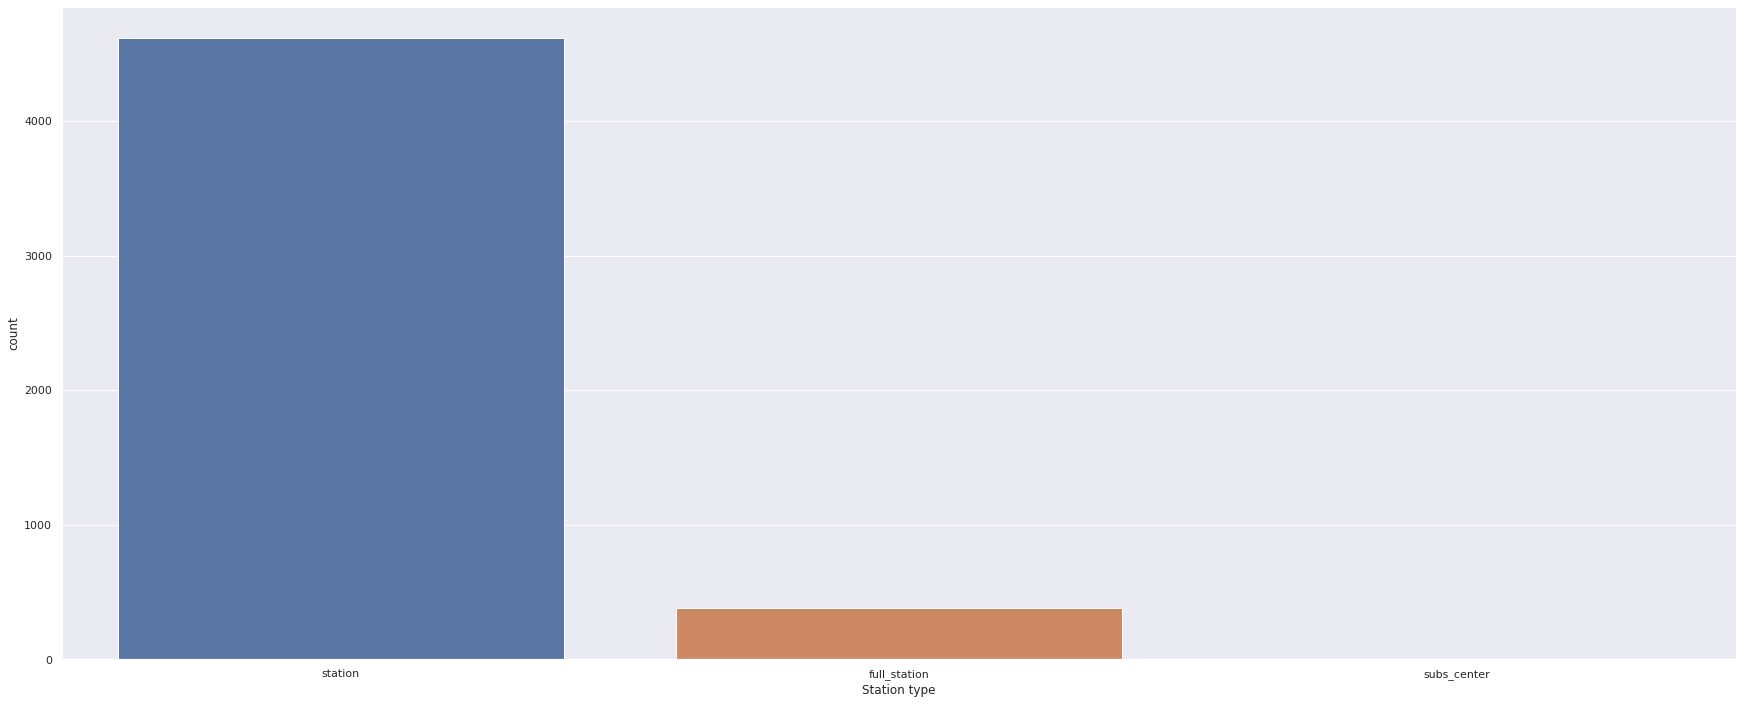

In [51]:
# most popular is station
sns.countplot(df['Station type'])

In [52]:
df.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City', 'ID',
       'Kind', 'Geo point', 'Postal code', 'Public name', 'Rental status',
       'Slots', 'Station type', 'Status', 'Subscription status', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [53]:
df["Postal code"].value_counts()

75015    274
75016    236
75017    221
75011    180
75020    169
75013    168
75012    168
75008    167
75019    158
75014    154
75018    141
92000    127
75010    117
75007    111
75009    106
92130    101
75006     94
75005     90
92500     88
94000     88
92600     70
75004     68
75003     67
92700     67
93100     63
92100     63
93700     62
75002     61
92150     59
92230     56
75001     55
93400     49
94140     46
92140     45
92300     39
92260     37
92310     36
93600     35
94800     35
92170     34
94500     33
92240     31
92320     31
93170     30
92190     28
92210     27
92220     26
94230     25
92250     25
93360     24
94450     24
92290     23
92350     22
92330     22
78150     21
94120     21
93230     21
93350     20
92160     20
94130     20
92400     19
78140     19
93110     19
78000     18
94110     17
92800     17
93500     16
94300     15
91370     15
93800     15
95100     15
94340     14
92120     14
92340     14
92200     13
95870     13
94700     13

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


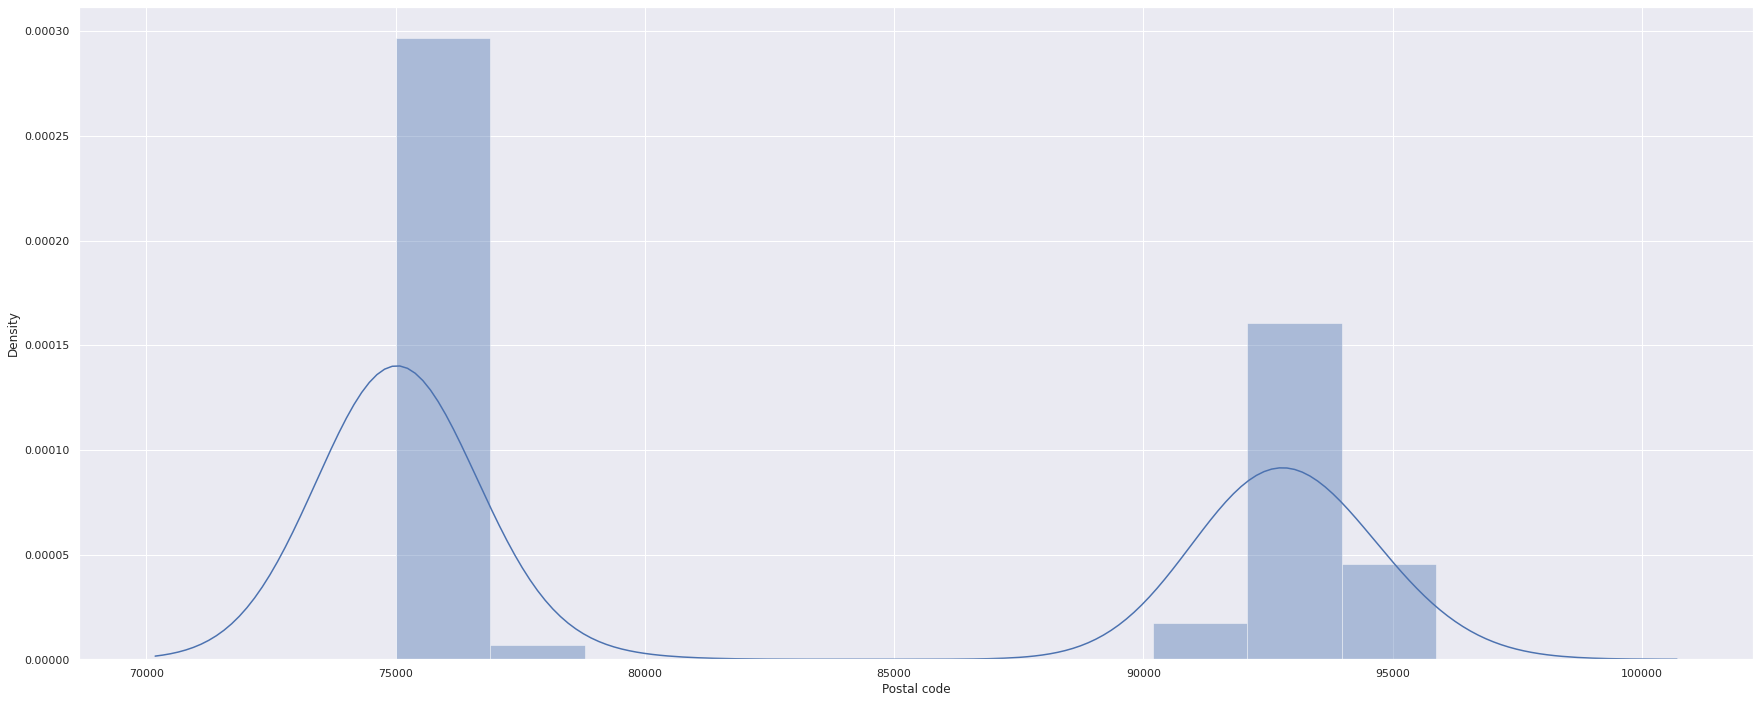

In [54]:
sns.distplot(df["Postal code"])

In [55]:
blue["Postal code"].value_counts()

75015    6
75016    5
75017    5
75008    4
75011    4
75014    4
75013    4
75019    4
75020    4
75007    3
75018    3
75010    3
75009    3
75005    3
75006    3
75001    3
75012    3
75003    2
75002    2
75004    2
75112    1
75116    1
Name: Postal code, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


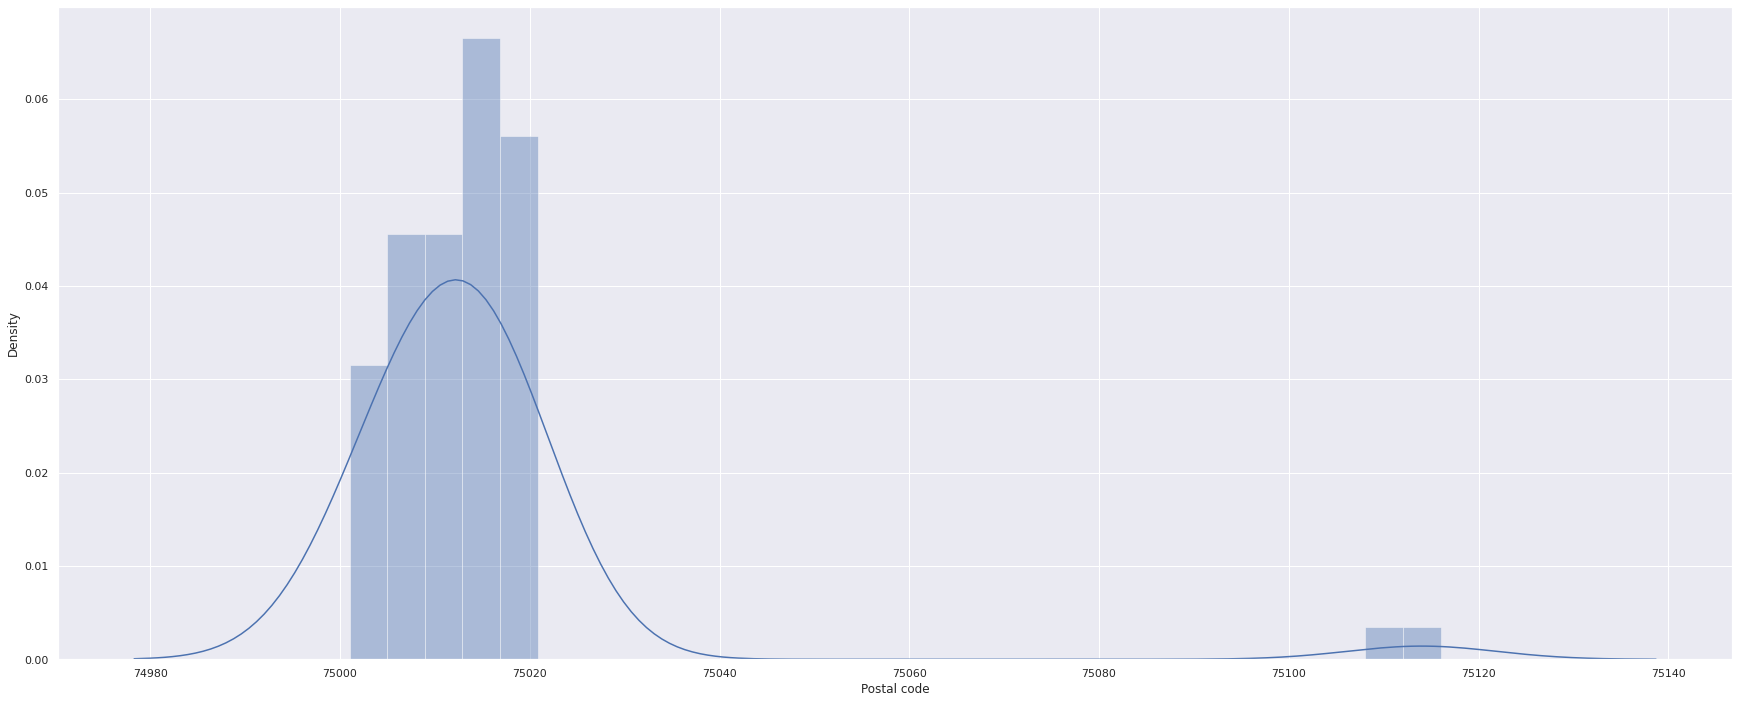

In [56]:
sns.distplot(blue["Postal code"])